# Traffic analysis of scuttlebutt messages

Humberto Ortiz-Zuazaga

## Introduction

The scuttlebutt protocol implements private messages with ["private box"](https://github.com/auditdrivencrypto/private-box), a protocol that hides the recipients from observers. Each message is encrypted to up to seven recipients. An observer can see only the timestamp, size, and the sender of messages.

We also know that participants in a private conversation must "follow" each other. Is there sufficient information in the scuttlebutt feed to determine who is private messaging whom?

We will try.

## Reading json feeds

You can save a json representation of your feed to a file

```
$ sbot feed > feed.txt
```

Then open the file and read in the json chunks

In [1]:
import json
import fileinput

In [2]:
# see https://stackoverflow.com/questions/20400818/python-trying-to-deserialize-multiple-json-objects-in-a-file-with-each-object-s

def load_json_multiple(segments):
    chunk = ""
    for segment in segments:
        chunk += segment
        try:
            yield json.loads(chunk)
            chunk = ""
        except ValueError:
            pass


In [3]:
# set up hash table for sender information
privates = {}

In [4]:
with fileinput.input("feed-2018-04-07.txt") as f:
   for parsed_json in load_json_multiple(f):
       value = parsed_json['value']
       if "content" in value and isinstance(value['content'], str):
           if value['content'].endswith(".box"):
                # found a secret box, get info
                author = value['author']
                timestamp = value['timestamp']
                contentlen = len(value["content"])
                if author not in privates:
                    # store list of timestamps and lengths
                    privates[author] = {"times" : [timestamp], 'lengths' : [contentlen]}
                else:
                    privates[author]["times"].append(timestamp)
                    privates[author]["lengths"].append(contentlen)

## Plotting the messages

The authors are indexed by private keys. You can get your key by running:
```
$ sbot whoami
{
  "id": "@RtsOc2h1gqh0fRrjrUTHAkRBu9YyDgsD+EWsfLpykrc=.ed25519"
}
```

In [5]:
me = "@RtsOc2h1gqh0fRrjrUTHAkRBu9YyDgsD+EWsfLpykrc=.ed25519"

In [6]:
privates[me]

{'lengths': [456,
  732,
  544,
  696,
  376,
  408,
  1076,
  420,
  600,
  876,
  956,
  1284,
  1016,
  980,
  1800],
 'times': [1491831936223,
  1492029611422,
  1492029700009,
  1492029849310,
  1492627558295,
  1493425862371,
  1513566638823,
  1514772506378,
  1514778514745,
  1516370433687,
  1517918714401,
  1521220294389,
  1521896083657,
  1522192161508,
  1522338089668]}

In [7]:
%matplotlib inline

In [8]:
import pylab
import numpy as np

In [9]:
xmin, xmax = np.min(privates[me]["times"]), np.max(privates[me]["times"])

(1491831936223, 1522338089668)

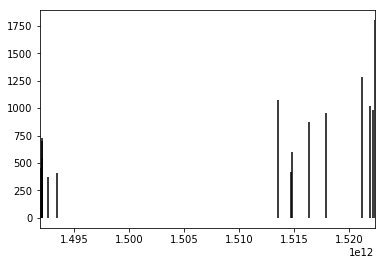

In [10]:
pylab.vlines(privates[me]["times"], privates[me]["lengths"], 0)
pylab.xlim(xmin,xmax)

In [11]:
israel = "@RDRnDaZhV5Yg1NWAN78D04iZtJ8hWrQoT5iBJfYcIpg=.ed25519"

(1491831936223, 1522338089668)

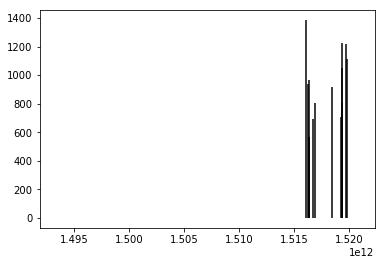

In [12]:
pylab.vlines(privates[israel]["times"], privates[israel]["lengths"],0)
pylab.xlim(xmin,xmax)

In [13]:
imin, imax = np.min(privates[israel]["times"]), np.max(privates[israel]["times"])

(1516109802045, 1519870653849)

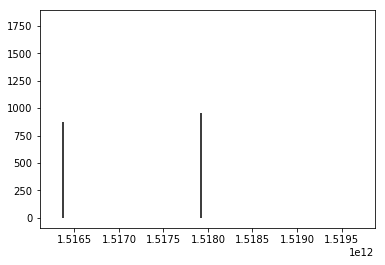

In [14]:
pylab.vlines(privates[me]["times"], privates[me]["lengths"], 0)
pylab.xlim(imin,imax)

(1516109802045, 1519870653849)

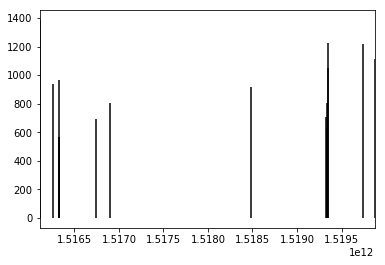

In [15]:
pylab.vlines(privates[israel]["times"], privates[israel]["lengths"],0)
pylab.xlim(imin,imax)

In [16]:
dominic = "@EMovhfIrFk4NihAKnRNhrfRaqIhBv1Wj8pTxJNgvCCY=.ed25519"

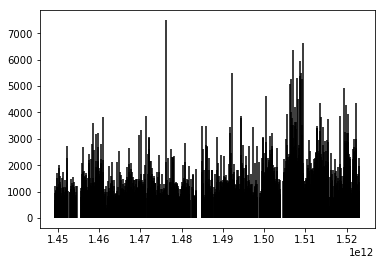

In [17]:
pylab.vlines(privates[dominic]["times"], privates[dominic]["lengths"], 0)

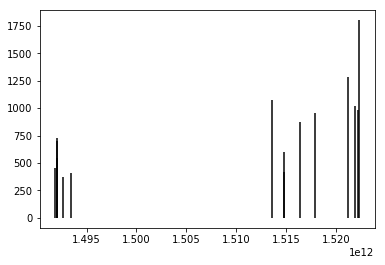

In [18]:
pylab.vlines(privates[me]["times"], privates[me]["lengths"], 0)

In [19]:
mix = "@ye+QM09iPcDJD6YvQYjoQc7sLF/IFhmNbEqgdzQo3lQ=.ed25519"

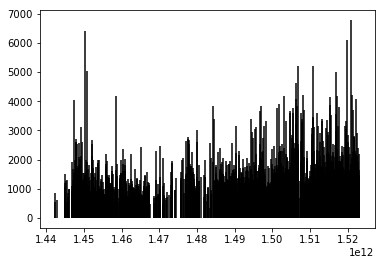

In [20]:
pylab.vlines(privates[mix]["times"], privates[mix]["lengths"], 0)